#  Introduction to Julia

## Preston Kamada and Aaron Grisez

### 1. What is the julia syntax for the following? (comments, variable declarations, printing output)

In [1]:
# This is use for a single lined comment

In [16]:
#= 
A hash followed directly by an equals sign is the start of a multi lined comment. 
The multi lined comment must end with an equals sign followed by a hash marker.
=#

In [5]:
# Assign variables using an equals sign before declaring them.

In [3]:
number = 5

5

In [4]:
number

5

In [6]:
OtherNumber007 = 3

3

In [7]:
OtherNumber007

3

In [9]:
println("Check it out... I'm using Julia!")

Check it out... I'm using Julia!


In [19]:
# To get the type of a value, use typeof().

In [17]:
typeof(3)

Int64

In [18]:
typeof(Bool)

DataType

In [21]:
#= 
To define a new type, use type, followed by your new type.
To define a subtype, use subtypes().
=#

In [29]:
grade = 83

if grade >= 89.5
    println("A")
elseif 79.5 <= grade <= 89.4
    println("B")
elseif 69.5 <= grade <= 79.4
    println("C")
elseif 59.5 <= grade <= 69.4
    println("D")
elseif grade <= 59.4
    println("F")
end

B


In [32]:
for cars = ["Toyota", "Honda", "Mazda"]
    println("Choose car make: $cars")
end    

Choose car make: Toyota
Choose car make: Honda
Choose car make: Mazda


In [33]:
fib = zeros(BigInt, 100)
fib[1] = 1
fib[2] = 1
for i in 3:100
    fib[i] = fib[i - 1] + fib[i - 2]
end
println(fib)

BigInt[1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181,6765,10946,17711,28657,46368,75025,121393,196418,317811,514229,832040,1346269,2178309,3524578,5702887,9227465,14930352,24157817,39088169,63245986,102334155,165580141,267914296,433494437,701408733,1134903170,1836311903,2971215073,4807526976,7778742049,12586269025,20365011074,32951280099,53316291173,86267571272,139583862445,225851433717,365435296162,591286729879,956722026041,1548008755920,2504730781961,4052739537881,6557470319842,10610209857723,17167680177565,27777890035288,44945570212853,72723460248141,117669030460994,190392490709135,308061521170129,498454011879264,806515533049393,1304969544928657,2111485077978050,3416454622906707,5527939700884757,8944394323791464,14472334024676221,23416728348467685,37889062373143906,61305790721611591,99194853094755497,160500643816367088,259695496911122585,420196140727489673,679891637638612258,1100087778366101931,1779979416004714189,2880067194370816120,4660046610375530309,7540113804746

In [7]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=150)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end
j0(z) = juliamap(0,z)
@vectorize_1arg Complex j0

j0 (generic function with 4 methods)

In [8]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;xpoints = 2000, ypoints = 2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

This cell generates the immutable object, Complex Plane. This is advantageous over simply defining the complex plane object as the immutable property prevents the plane from being changed after it is declared.

In [9]:
cp = ComplexPlane(xpoints=2000,ypoints=2000)
typeof(cp)

ComplexPlane

This cell defines a variable cp which is of the immutable type defined above. This variable is an array of points representing a mesh for the complex plane upon which we can graph functions, like the Julia Set.

In [10]:
print(typeof(cp.x))
j0(cp.z)[680:700,680:700]

LinSpace{Float64}

21x21 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0 

In [12]:
using PyPlot                     #  Load package into the current namespace

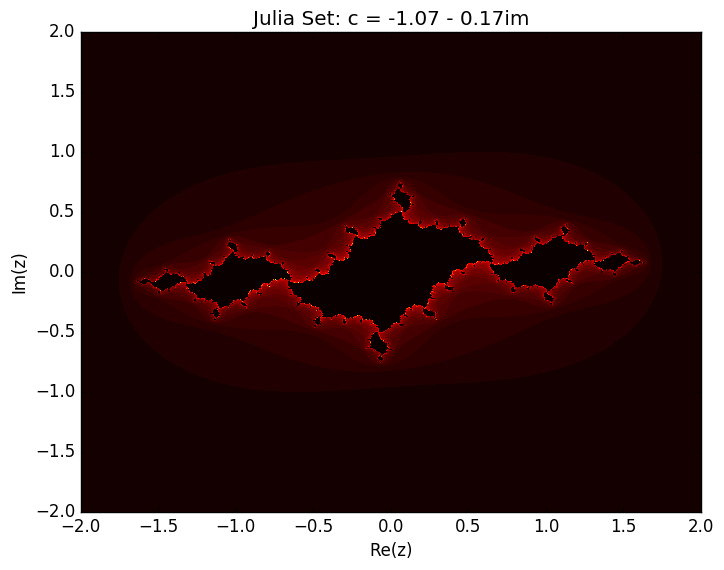

PyObject <matplotlib.collections.QuadMesh object at 0x7f68bc0cdbd0>

In [13]:
c = -1.07 - 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
#display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

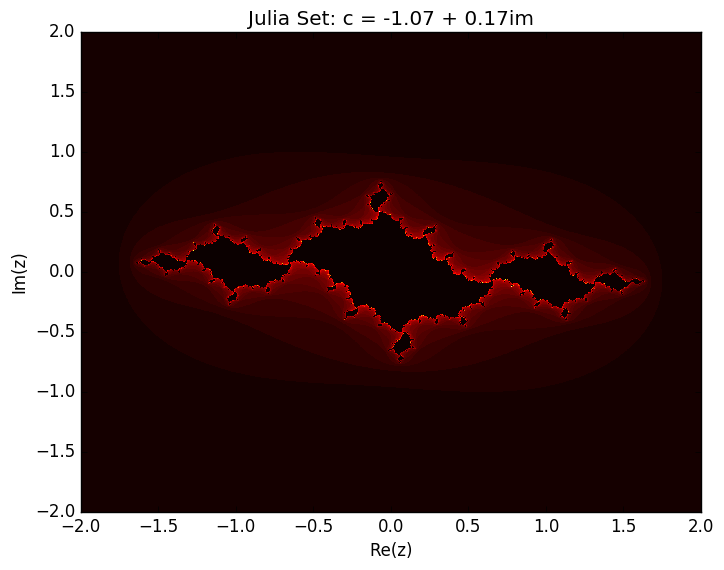

PyObject <matplotlib.collections.QuadMesh object at 0x7f68cd9a5810>

In [15]:
c = -1.07 + 0.17im                    #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))